This notebook has a hand written version of K Means implemented, which means we can test many different variations.

Variations to try:
    * different types of generated points
    * different numbers of clusters, ie k
    * different types of metrics
    * different initalization techniques for the centroids

Search for the #TODO tag to find easy to change spots.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [9]:
# K-Means Implementation

class K_Means:
    """Hand coded version of K Means with hooks for customizations.
    """

    def __init__(self, tolerance=0.0001, max_iterations=500):
        """Initializes a K Means solver.
        
        Kwargs:
            tolerance: float, not currently implemented
            max_iterations: int, number of iteratiosn
        """
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.colors = 10 * ['r', 'g', 'c', 'b', 'm', 'y']
        
    def initialize_centroids(self, k, points):
        """Picks the k initial points to use as centroids.
        
        Args:
            k: int, number of centroids
            points: list of tuples, the data being fitted from
            
        Returns:
            (list of tuples)
        """
        # TODO ask how much impact different initialization techniques have
        # may be dependent on how the data is handed in.
        return points[:k]
        
    def fit(self, k, points, distance_f, plot_freq=100):
        """Heart of K-Means. Runs K-Means iteratively over points
        
        Args:
            k: int, number of clusters to find
            points: list of tuples, the [(x1, y1), (x2, y2) ...] set of points to fit
            distance_f: function that takes 2 points and returns a float
            
        Kwargs:
            plot_freq: int, how many iterations between plotting. Set to -1 if
                only want the latest plot.
        """
        # Initialize Clusters
        self.clusters = {}
        self.centroids = self.initialize_centroids(k, points)
        
        for iteration in range(self.max_iterations):
            # Restart with no points in any group
            self.clusters = {}
            for i in range(k):
                self.clusters[i] = []

            # Pop each point into the cluster with the nearest centroid
            for point in points:
                distances = [distance_f(point, centroid) for centroid in self.centroids]
                new_cluster = distances.index(min(distances))
                self.clusters[new_cluster].append(point)
                
            # Update Centroids
            def center_f(points):
                avg_x = sum(i for (i, j) in points) / float(len(points))
                avg_y = sum(j for (i, j) in points) / float(len(points))
                return (avg_x, avg_y)

            previous_centroids = self.centroids
            self.centroids = [
                (center_f(self.clusters[cluster]) if len(self.clusters[cluster]) != 0 else self.centroids[cluster])
                for cluster in self.clusters
            ]
                
            """
            # Check if the solution has reached a local min, if so break
            # Local min is defined as no centroids move more than the tolerance
            isOptimal = True
            for (prev_centroid, centroid) in zip(previous_centroids, self.centroids):
                delta_x 
                delta = np.sum(curr - original_centroid)/original_centroid
                if delta /  > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break
            """
            
            # Plot intermediate progress
            if plot_freq > 0 and iteration % plot_freq == 0:
                fig = plt.figure()
                ax = fig.add_subplot(111)
                self.plot_clusters(ax)
                completed_i = iteration + 1
                ax.set_title('Clusters After {completed_i} iterations'.format(**locals()),
                             size='xx-large')
                
        # Plot the final clusters
        fig = plt.figure()
        ax = fig.add_subplot(111)
        self.plot_clusters(ax)
        ax.set_title('Final Cluster Assignment', size='xx-large')
                               
    def plot_clusters(self, ax):
        """Quick plotting of where the clusters are at the moment.
        
        Args:
            ax: subplot to plot directly into

        Returns:
            None - plots in the passed in ax
        """
        for cluster in self.clusters:
            x = [i for (i, j) in self.clusters[cluster]]
            y = [j for (i, j) in self.clusters[cluster]]
            ax.plot(x, y, self.colors[cluster] + '.')
            
        for (i, j) in self.centroids:
            ax.plot(i, j, 'kd', markersize=7)

In [4]:
def generate_points(n, mu_x, mu_y, sigma_x, sigma_y):
    """Generates a normal distribution with specified means and standard deviations.
    
    Args:
        n: int, number of points to generate
        mu_x: 
        ...etc JTODO complete
    """
    for i in range(n):
        x = np.random.normal(mu_x, sigma_x, n)
        y = np.random.normal(mu_y, sigma_y, n)
        
    return [(i, j) for (i, j) in zip(x, y)]

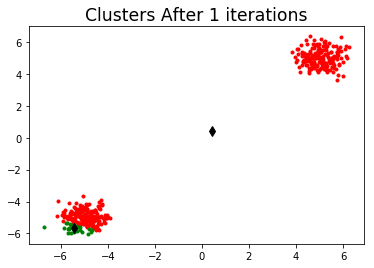

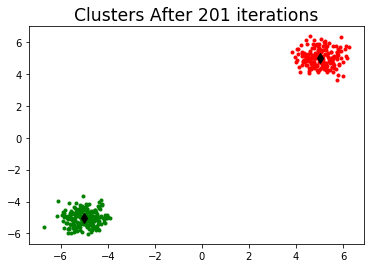

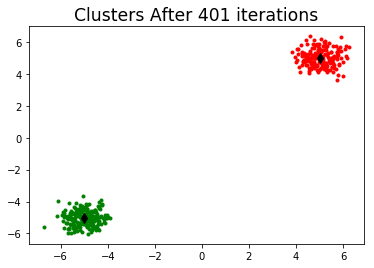

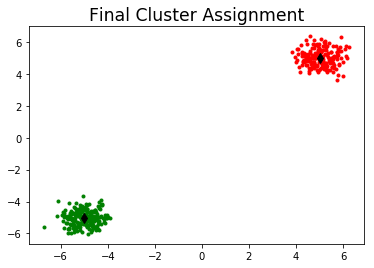

In [5]:
# Easy Peasy Example with L2 norm and two well separated clusters
def l2_norm(x1, x2):
    return sum((i - j)**2 for (i, j) in zip(x1, x2))**0.5

points = generate_points(200, -5, -5, 0.5, 0.5)
points.extend(generate_points(200, 5, 5, 0.5, 0.5))

kmeans = K_Means()
kmeans.fit(2, points, l2_norm, plot_freq=200)

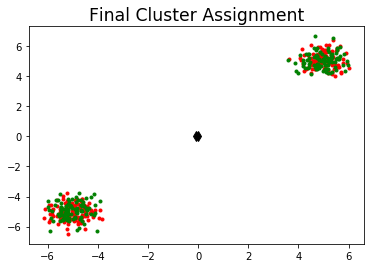

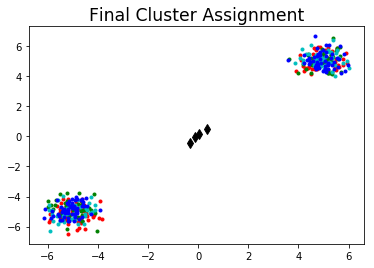

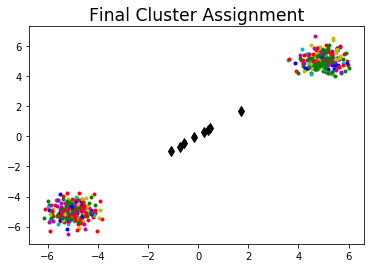

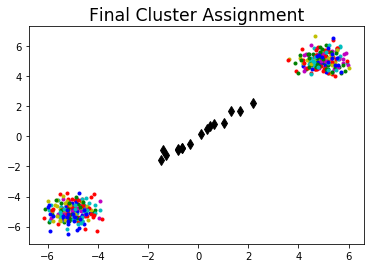

In [6]:
# Show absolute rubish metric and it's impact on 
import random

points = generate_points(200, -5, -5, 0.5, 0.5)
points.extend(generate_points(200, 5, 5, 0.5, 0.5))

def random_norm(x1, x2):
    return random.random()

kmeans = K_Means()
kmeans.fit(2, points, random_norm, plot_freq=-1)
kmeans.fit(4, points, random_norm, plot_freq=-1)
kmeans.fit(8, points, random_norm, plot_freq=-1)
kmeans.fit(16, points, random_norm, plot_freq=-1)

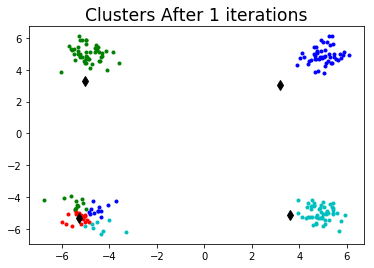

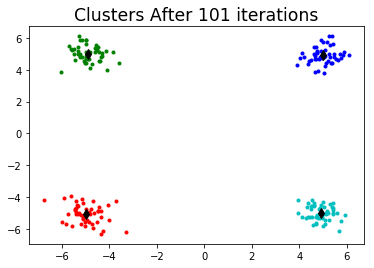

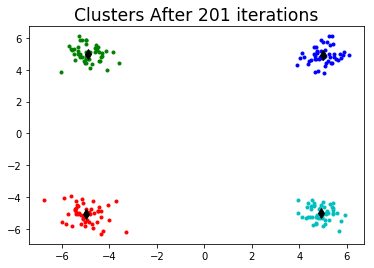

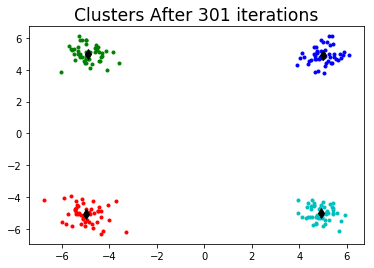

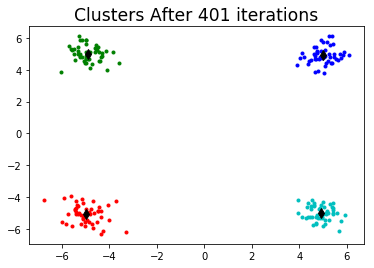

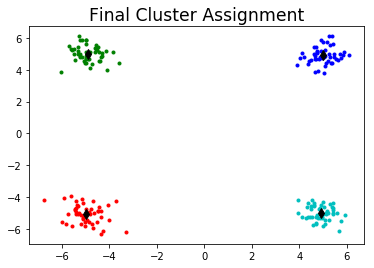

In [10]:
# Back on Track Example with 4 clear clusters
points = generate_points(50, -5, -5, 0.5, 0.5)
points.extend(generate_points(50, 5, 5, 0.5, 0.5))
points.extend(generate_points(50, -5, 5, 0.5, 0.5))
points.extend(generate_points(50, 5, -5, 0.5, 0.5))

kmeans = K_Means()
kmeans.fit(4, points, l2_norm, plot_freq=100)

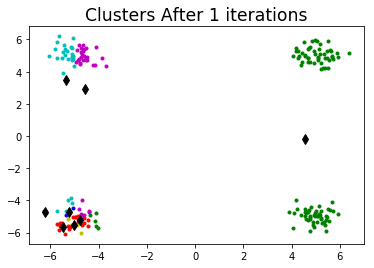

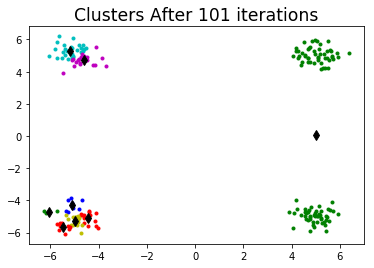

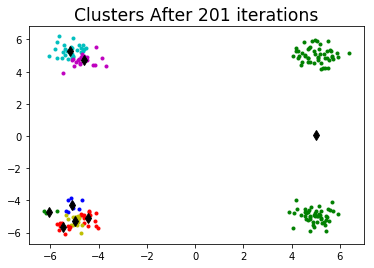

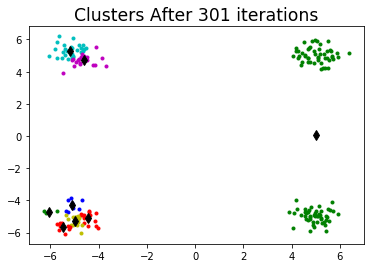

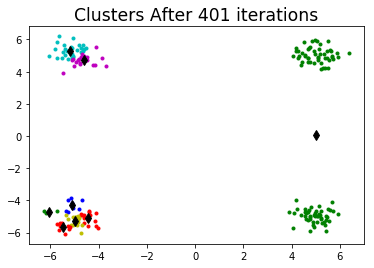

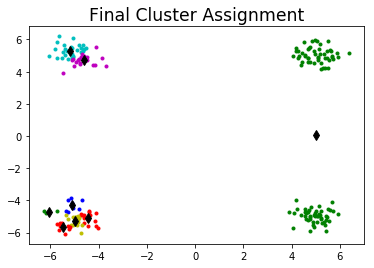

In [11]:
# Back on Track Example with 4 clear clusters .... but higher k
points = generate_points(50, -5, -5, 0.5, 0.5)
points.extend(generate_points(50, 5, 5, 0.5, 0.5))
points.extend(generate_points(50, -5, 5, 0.5, 0.5))
points.extend(generate_points(50, 5, -5, 0.5, 0.5))

kmeans = K_Means()
kmeans.fit(8, points, l2_norm, plot_freq=100)

Dang it! Looks like with well separated clusters, K-Means can be easily tricked!

How could we fix this?

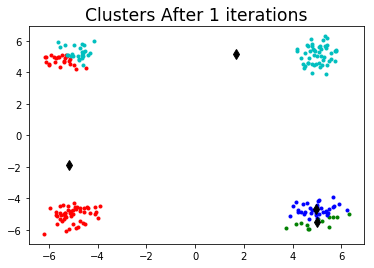

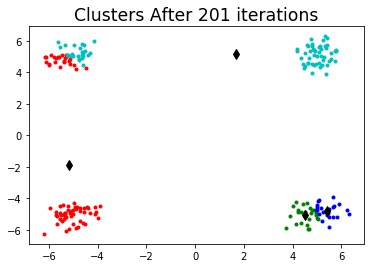

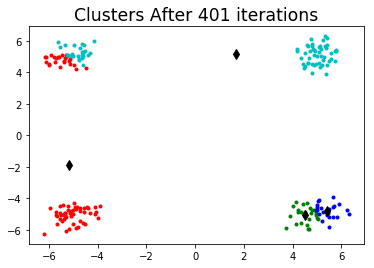

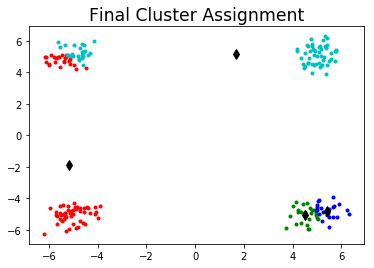

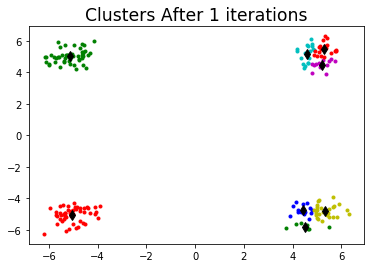

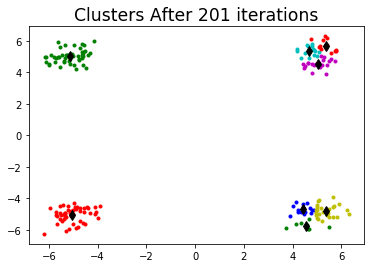

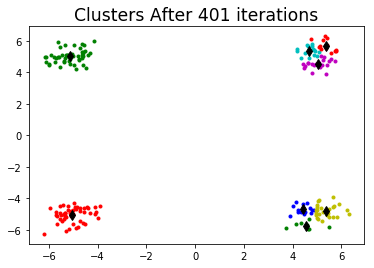

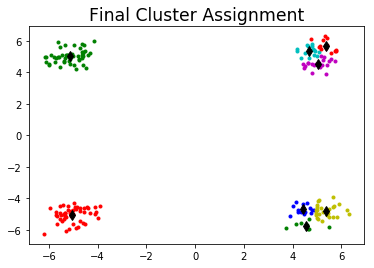

In [12]:
# Back on Track Example with 4 clear clusters .... but higher k ..... shuffle initial points
points = generate_points(50, -5, -5, 0.5, 0.5)
points.extend(generate_points(50, 5, 5, 0.5, 0.5))
points.extend(generate_points(50, -5, 5, 0.5, 0.5))
points.extend(generate_points(50, 5, -5, 0.5, 0.5))

x = [i for i in range(len(points))]
random.shuffle(x)
points = [points[i] for i in x]

kmeans = K_Means()
kmeans.fit(4, points, l2_norm, plot_freq=200)
kmeans.fit(8, points, l2_norm, plot_freq=200)

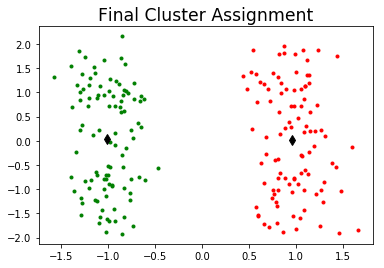

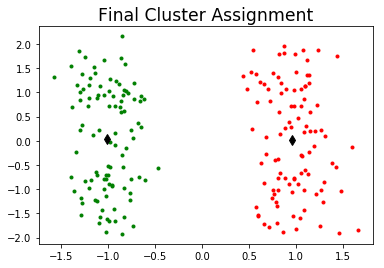

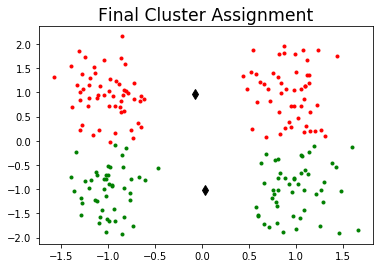

In [15]:
# One Last Example, more overlap between clusters in 1 dimension with different norms
points = generate_points(50, -1, -1, 0.25, 0.5)
points.extend(generate_points(50, 1, 1, 0.25, 0.5))
points.extend(generate_points(50, -1, 1, 0.25, 0.5))
points.extend(generate_points(50, 1, -1, 0.25, 0.5))


x = [i for i in range(len(points))]
random.shuffle(x)
points = [points[i] for i in x]

def only_x_norm(x1, x2):
    return abs(x1[0] - x2[0])


def only_y_norm(x1, x2):
    return abs(x1[1] - x2[1])


kmeans = K_Means()
kmeans.fit(2, points, l2_norm, plot_freq=-1)
kmeans.fit(2, points, only_x_norm, plot_freq=-1)
kmeans.fit(2, points, only_y_norm, plot_freq=-1)

In [59]:
# TODO try a variation with a different number of clusters and k

In [60]:
# TODO code and try a new metric

In [ ]:
# TODO generate an interesting set of points - what is the best k and metric to pull out?